# 신경망 학습

## 단순한 신경망 구현 : Logic Gate

### 필요한 모듈 import

In [113]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

### 하이퍼 파라미터(Hyper Parameter)

In [114]:
lr = 0.1
epochs = 1000

### 유틸 함수들(Util Functions)
$\left(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1}\right) (∂f∂x0​​,∂f∂x1​​)  $

In [115]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

def cross_entropy_error(pred_y, true_y):
    delta = 1e-7
    if true_y.ndim == 1:
        pred_y = pred_y.reshape(-1, 1)
        true_y = true_y.reshape(-1, 1)
    return -np.sum(true_y * np.log(pred_y + delta))

def cross_entropy_error_for_bin(pred_y, true_y):
    if true_y.ndim == 1:
        pred_y = pred_y.reshape(-1, 1)
        true_y = true_y.reshape(-1, 1)
    return -np.sum((true_y * np.log(pred_y), (1 - true_y) * np.log(1 - pred_y)))

def cross_entropy_error_for_batch(pred_y, true_y):
    delta = 1e-7
    batch_size = pred_y.shape[0]
    if true_y.ndim == 1:
        pred_y = pred_y.reshape(-1, 1)
        true_y = true_y.reshape(-1, 1)
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def mean_squared_error(pred_y, true_y):
    return np.mean(np.square(true_y - pred_y))

def differential_1d(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
        temp_val = x[i]

        x[i] = temp_val + eps
        f_h1 = f(x)

        x[i] = temp_val - eps
        f_h2 = f(x)

        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        x[i] = temp_val
    
    return diff_value

def differential_2d(f, X):
    if X.ndim == 1:
        return differential_1d(f, X)
    else:
        grads = np.zeros_like(X)

        for idx, x in enumerate(X):
            grads[idx] = differential_1d(f, x)
        
        return grads

### 신경망

In [116]:
class LogicGateNet():

    def __init__(self, input_nodes, output_units):
        # 가중치 및 편향 생성
        def weight_init(input_nodes, output_units):
            np.random.seed(1)
            params = {}
            params["w_1"] = np.random.randn(input_nodes * output_units) # np.random.randn(a) => 1차원으로 a개의 랜덤한 정규분포 수들을 추출 / np.random.randn(a, b) => (a, b)배열의 2차원으로 랜덤한 정규분포 수들을 추출
            params["b_1"] = np.random.rand(output_units)
            return params
        
        self.params = weight_init(input_nodes, output_units)

    # 예측값 생성
    def predict(self, x):
        W_1 = self.params["w_1"].reshape(-1, 1)
        B_1 = self.params["b_1"]
        pred_y = sigmoid(np.dot(x, W_1) + B_1)
        return pred_y

    # 손실(오차) 생성
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
        
    # 기울기 생성
    def get_gradient(self, x, true_y):
        def loss_grad(grad):
            return self.loss(x, true_y)
        
        grads = {}
        grads["w_1"] = differential_1d(loss_grad, self.params["w_1"])
        grads["b_1"] = differential_1d(loss_grad, self.params["b_1"])
        return grads

### AND Gate

#### 모델 생성 및 학습

In [117]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_1 = np.array([[0], [0], [0], [1]])

AND = LogicGateNet(input_nodes=X.shape[1], output_units=Y_1.shape[1])

for i in range(epochs):
    grads = AND.get_gradient(X, Y_1)

    for key in grads.keys():
        AND.params[key] -= lr * grads[key]
    
    loss = AND.loss(X, Y_1)
    
    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Gradient: {}, Bias: {}".format(i + 1, loss, AND.params["w_1"].reshape(-1, ), AND.params["b_1"].reshape(-1, )))

Epoch: 100, Cost: 0.9879373568735578, Gradient: [2.01503856 1.71662117], Bias: [-3.08282757]
Epoch: 200, Cost: 0.6506687590545478, Gradient: [2.79693855 2.73539701], Bias: [-4.37630256]
Epoch: 300, Cost: 0.4860468400349507, Gradient: [3.40228815 3.3848267 ], Bias: [-5.29773137]
Epoch: 400, Cost: 0.3868848037166772, Gradient: [3.8824553  3.87626796], Bias: [-6.01648561]
Epoch: 500, Cost: 0.3205891407037802, Gradient: [4.27734849 4.27477562], Bias: [-6.60554348]
Epoch: 600, Cost: 0.27322844972348626, Gradient: [4.61168928 4.6104836 ], Bias: [-7.10408809]
Epoch: 700, Cost: 0.23776988486634595, Gradient: [4.9011229  4.90050339], Bias: [-7.5358348]
Epoch: 800, Cost: 0.21026996938492645, Gradient: [5.15603123 5.15568883], Bias: [-7.91628056]
Epoch: 900, Cost: 0.18834642177042332, Gradient: [5.38361567 5.38341492], Bias: [-8.25611777]
Epoch: 1000, Cost: 0.17047648607833352, Gradient: [5.58906188 5.58893832], Bias: [-8.56303389]


#### 테스트

In [118]:
print(AND.predict(X))

[[1.91002335e-04]
 [4.86099648e-02]
 [4.86156795e-02]
 [9.31818598e-01]]


### OR Gate

#### 모델 생성 및 학습

In [119]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_2 = np.array([[0], [1], [1], [1]])

OR = LogicGateNet(input_nodes=X.shape[1], output_units=Y_2.shape[1])

for i in range(epochs):
    grads = OR.get_gradient(X, Y_2)

    for key in grads.keys():
        OR.params[key] -= lr * grads[key]
    
    loss = OR.loss(X, Y_2)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Gradient: {}, Bias: {}".format(i + 1, loss, OR.params["w_1"].reshape(-1, ), OR.params["b_1"].reshape(-1, )))

Epoch: 100, Cost: 0.6786576335658816, Gradient: [2.98831871 2.39880239], Bias: [-0.67875835]
Epoch: 200, Cost: 0.4120065907316995, Gradient: [3.85457519 3.61235159], Bias: [-1.30773792]
Epoch: 300, Cost: 0.2929230206606818, Gradient: [4.51092321 4.38480447], Bias: [-1.70090032]
Epoch: 400, Cost: 0.22594941843677072, Gradient: [5.02588551 4.94993214], Bias: [-1.98818437]
Epoch: 500, Cost: 0.1833052982705829, Gradient: [5.44543336 5.39513131], Bias: [-2.21445381]
Epoch: 600, Cost: 0.15390070356223973, Gradient: [5.79774684 5.76215647], Bias: [-2.40088812]
Epoch: 700, Cost: 0.13245996247876582, Gradient: [6.10062111 6.0741922 ], Bias: [-2.55926578]
Epoch: 800, Cost: 0.11616495526038, Gradient: [6.3658123  6.34545117], Bias: [-2.69682842]
Epoch: 900, Cost: 0.10337885508874566, Gradient: [6.60142242 6.58527659], Bias: [-2.81834678]
Epoch: 1000, Cost: 0.0930883806927856, Gradient: [6.81324253 6.80013851], Bias: [-2.9271287]


#### 테스트

In [120]:
print(OR.predict(X))

[[0.05082867]
 [0.97962797]
 [0.97988785]
 [0.99997714]]


### NAND Gate

#### 모델 생성 및 학습

In [121]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_3 = np.array([[1], [1], [1], [0]])

NAND = LogicGateNet(input_nodes=X.shape[1], output_units=Y_3.shape[1])

for i in range(epochs):
    grads = NAND.get_gradient(X, Y_3)

    for key in grads.keys():
        NAND.params[key] -= lr * grads[key]
    
    loss = NAND.loss(X, Y_3)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.params["w_1"].reshape(-1, ), NAND.params["b_1"].reshape(-1, )))

Epoch: 100, Cost: 1.0843477603747682, Weights: [-1.52038477 -1.8044596 ], Bias: [2.79613861]
Epoch: 200, Cost: 0.6902784247155889, Weights: [-2.61076184 -2.66551134], Bias: [4.18950611]
Epoch: 300, Cost: 0.5080628196571597, Weights: [-3.29126404 -3.30609336], Bias: [5.15778594]
Epoch: 400, Cost: 0.4009142794906003, Weights: [-3.80128706 -3.80637256], Bias: [5.90451903]
Epoch: 500, Cost: 0.3302901304973989, Weights: [-4.21231761 -4.21438224], Bias: [6.51232147]
Epoch: 600, Cost: 0.2803201967667349, Weights: [-4.55704426 -4.55799437], Bias: [7.02432061]
Epoch: 700, Cost: 0.24317000579159848, Weights: [-4.85385997 -4.85434129], Bias: [7.46619134]
Epoch: 800, Cost: 0.21451287067550753, Weights: [-5.11434269 -5.11460572], Bias: [7.85452518]
Epoch: 900, Cost: 0.19176409008017314, Weights: [-5.34630895 -5.34646174], Bias: [8.20067666]
Epoch: 1000, Cost: 0.17328577069498524, Weights: [-5.55529987 -5.55539319], Bias: [8.51275788]


#### 테스트

In [122]:
print(NAND.predict(X))

[[0.99979915]
 [0.95061041]
 [0.95061479]
 [0.06927143]]


### XOR Gate

#### 모델 생성 및 학습

In [123]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_4 = np.array([[0], [1], [1], [0]])

XOR = LogicGateNet(input_nodes=X.shape[1], output_units=Y_4.shape[1])

for i in range(epochs):
    grads = XOR.get_gradient(X, Y_4)

    for key in grads.keys():
        XOR.params[key] -= lr * grads[key]
    
    loss = XOR.loss(X, Y_4)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.params["w_1"].reshape(-1, ), XOR.params["b_1"].reshape(-1, )))
    

Epoch: 100, Cost: 2.775810299574745, Weights: [ 0.15549717 -0.03283867], Bias: [-0.0727685]
Epoch: 200, Cost: 2.772645288796451, Weights: [0.0201055  0.00512345], Bias: [-0.01496259]
Epoch: 300, Cost: 2.7725906094087485, Weights: [0.00318944 0.0019981 ], Bias: [-0.00307658]
Epoch: 400, Cost: 2.772588798836752, Weights: [0.00058069 0.00048596], Bias: [-0.0006326]
Epoch: 500, Cost: 2.7725887254580046, Weights: [0.00011343 0.00010589], Bias: [-0.00013007]
Epoch: 600, Cost: 2.7725887223757146, Weights: [2.28475138e-05 2.22485217e-05], Bias: [-2.67451295e-05]
Epoch: 700, Cost: 2.772588722245527, Weights: [4.66006228e-06 4.61244243e-06], Bias: [-5.49923334e-06]
Epoch: 800, Cost: 2.772588722240024, Weights: [9.55176997e-07 9.51404291e-07], Bias: [-1.13073444e-06]
Epoch: 900, Cost: 2.7725887222397914, Weights: [1.96157483e-07 1.95873098e-07], Bias: [-2.32497405e-07]
Epoch: 1000, Cost: 2.7725887222397816, Weights: [4.03132567e-08 4.02975452e-08], Bias: [-4.78051432e-08]


#### 테스트

In [124]:
print(XOR.predict(X))

[[0.49999999]
 [0.5       ]
 [0.5       ]
 [0.50000001]]


#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- 두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현

- 06 신경망 구조 참고

In [125]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)
X_2 = np.c_[s1, s2]
X_2

array([[0.99979915, 0.05082867],
       [0.95061041, 0.97962797],
       [0.95061479, 0.97988785],
       [0.06927143, 0.99997714]])

#### 테스트

In [126]:
print(AND.predict(X_2))

[[0.06350555]
 [0.90247804]
 [0.90260795]
 [0.06997581]]


#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [127]:
class XORNet():
    
    def __init__(self):
        # 가중치 및 편향 생성
        def weight_init():
            np.random.seed(1)
            params = {}
            params["w_1"] = np.random.randn(2)
            params["b_1"] = np.zeros(2)
            params["w_2"] = np.random.randn(2)
            params["b_2"] = np.zeros(1)
            return params
        
        # 2층 신경망으로 구성
        self.params = weight_init()
    
    # 예측값 생성
    def predict(self, x):
        W_1, W_2 = self.params["w_1"].reshape(-1, 1), self.params["w_2"].reshape(-1, 1)
        B_1, B_2 = self.params["b_1"], self.params["b_2"]

        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)

        A2 = np.dot(Z1, W_2) + B_2
        pred_y = sigmoid(A2)
        return pred_y
    
    # 손실(오차) 생성
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error_for_bin(pred_y, true_y)
    
    # 기울기 생성
    def get_gradient(self, x, true_y):
        def loss_grad(grad):
            return self.loss(x, true_y)
        
        grads = {}
        grads["w_1"] = differential_2d(loss_grad, self.params["w_1"])
        grads["w_2"] = differential_2d(loss_grad, self.params["w_2"])
        grads["b_1"] = differential_2d(loss_grad, self.params["b_1"])
        grads["b_2"] = differential_2d(loss_grad, self.params["b_2"])
        return grads

In [128]:
a = np.random.randn(1, 2)
print(a)

[[-0.80217284 -0.44887781]]


#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [129]:
lr = 0.3

#### 모델 생성 및 학습

In [130]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # 입력값
Y_5 = np.array([[0], [1], [1], [0]]) # 입력값에 대한 레이블

XOR = XORNet()

for i in range(epochs):
    grads = XOR.get_gradient(X, Y_5)

    for key in grads.keys():
        XOR.params[key] -= lr * grads[key]
    
    loss = XOR.loss(X, Y_5) # 입력값에 대한 예측값과 레이블 간의 손실(오차)

    if i % 100 == 99:
        print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, (XOR.params["w_1"], XOR.params["w_2"]), (XOR.params["b_1"], XOR.params["b_2"])))

Epoch: 100, Cost: 2.663783038416127, Weights: (array([ 2.31714726, -1.42567368]), array([-0.0017465 , -1.18730127])), Bias: (array([0.15275705, 0.98776375]), array([0.85106587]))
Epoch: 200, Cost: 0.9526283824161293, Weights: (array([ 4.10287848, -4.37106997]), array([ 3.72906674, -3.92370088])), Bias: (array([-2.00699021,  2.47472511]), array([1.80665456]))
Epoch: 300, Cost: 0.27773538322470437, Weights: (array([ 5.57959884, -5.76491213]), array([ 6.4760945 , -6.14241619])), Bias: (array([-2.85133424,  2.9812897 ]), array([2.76310621]))
Epoch: 400, Cost: 0.1526861761737508, Weights: (array([ 6.1443265 , -6.29184616]), array([ 7.65898747, -7.25386579])), Bias: (array([-3.1528817 ,  3.19865241]), array([3.30425121]))
Epoch: 500, Cost: 0.10396375609391117, Weights: (array([ 6.47108487, -6.59780266]), array([ 8.40164484, -7.97469628])), Bias: (array([-3.32482777,  3.33185343]), array([3.66307845]))
Epoch: 600, Cost: 0.07845245187103636, Weights: (array([ 6.6955996 , -6.80886039]), array([

#### 테스트

In [131]:
print(XOR.predict(X))

[[0.00873007]
 [0.9871619 ]
 [0.9913166 ]
 [0.0087467 ]]


## 다중 클래스 분류 : MNIST Dataset

### 배치 처리
- 학습 데이터 전체를 한번에 진행하지 않고  
  일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행

- 확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름

#### 신경망 구현 : MNIST 

#### 필요한 모듈 임포트

In [132]:
import tensorflow
import time
from tqdm.notebook import tqdm

#### 데이터 로드

In [133]:
mnist = tensorflow.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 데이터 확인

In [134]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


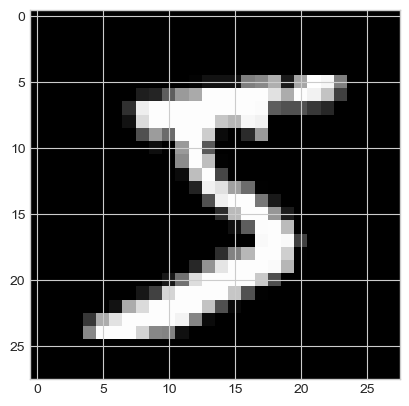

In [135]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [136]:
y_train[0]

5

#### 데이터 전처리 (Data Preprocessing)

In [137]:
def flatten_for_mnist(data):
    temp = np.zeros((data.shape[0], data[0].size))

    for idx, data in enumerate(data):
        temp[idx, :] = data.flatten()

    return temp

In [138]:
# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 원-핫 인코딩
y_train_ohe, y_test_ohe = tensorflow.one_hot(y_train, depth=10).numpy(), tensorflow.one_hot(y_test, depth=10).numpy()
print(y_train_ohe.shape)
print(y_test_ohe.shape)

# 28*28 데이터를 평탄화
x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)
print(x_train.shape)
print(x_test.shape)

(60000, 10)
(10000, 10)
(60000, 784)
(10000, 784)


In [139]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### 하이퍼 파라미터(Hyper Parameter)

In [140]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

#### 사용되는 함수들(Util Functions)

In [141]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

def cross_entropy_error(pred_y, true_y):
    delta = 1e-7
    if true_y.ndim == 1:
        pred_y = pred_y.reshape(-1, 1)
        true_y = true_y.reshape(-1, 1)
    return -np.sum((true_y * np.log(pred_y + delta)))

def cross_entropy_error_for_bin(pred_y, true_y):
    if true_y.ndim == 1:
        pred_y = pred_y.reshape(-1, 1)
        true_y = true_y.reshape(-1, 1)
    return -np.sum((true_y * np.log(pred_y), (1 - true_y) * np.log(1 - pred_y)))

def cross_entropy_error_for_batch(pred_y, true_y):
    delta = 1e-7
    batch_size = pred_y.shape[0]
    if true_y.ndim == 1:
        pred_y = pred_y.reshape(-1, 1)
        true_y = true_y.reshape(-1, 1)
    return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

def mean_squared_error(pred_y, true_y):
    return np.mean(np.square(true_y - pred_y))

def differential_1d(f, x):
    eps = 1e-5
    diff_value = np.zeros_like(x)

    for i in range(x.shape[0]):
        temp_val = x[i]

        x[i] = temp_val + eps
        f_h1 = f(x)

        x[i] = temp_val - eps
        f_h2 = f(x)

        diff_value[i] = (f_h1 - f_h2) / (2 * eps)
        x[i] = temp_val
    
    return diff_value

def differential_2d(f, X):
    if X.ndim == 1:
        return differential_1d(f, X)
    else:
        temp = np.zeros_like(X)

        for idx, x in enumerate(X):
            temp[idx] = differential_1d(f, x)
        
        return temp

#### 2층 신경망으로 구현

In [142]:
class MyModel():
    
    def __init__(self):
        # 가중치 및 편향 생성
        def weight_init(input_nodes, hidden_nodes, output_units):
            np.random.seed(1)
            params = {}
            params["w_1"] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
            params["b_1"] = np.zeros(hidden_nodes)
            params["w_2"] = 0.01 * np.random.randn(hidden_nodes, output_units)
            params["b_2"] = np.zeros(output_units)
            return params
        
        # 2층 신경망으로 구성
        self.params = weight_init(784, 64, 10)
    
    # 예측값 생성
    def predict(self, x):
        W_1, W_2 = self.params["w_1"], self.params["w_2"]
        B_1, B_2 = self.params["b_1"], self.params["b_2"]

        A1 = np.dot(x, W_1) + B_1
        Z1 = sigmoid(A1)

        A2 = np.dot(Z1, W_2) + B_2
        pred_y = softmax(A2)
        return pred_y
    
    # 정확도 생성
    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        y_argmax = np.argmax(pred_y, axis=1)
        t_argmax = np.argmax(true_y, axis=1)
        accuracy = np.sum(y_argmax == t_argmax) / float(x.shape[0])
        return accuracy

    # 손실(오차) 생성
    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return cross_entropy_error(pred_y, true_y)
    
    # 기울기 생성
    def get_gradient(self, x, true_y):
        def loss_grad(grad):
            return self.loss(x, true_y)
        
        grads = {}
        grads["w_1"] = differential_2d(loss_grad, self.params["w_1"])
        grads["w_2"] = differential_2d(loss_grad, self.params["w_2"])
        grads["b_1"] = differential_2d(loss_grad, self.params["b_1"])
        grads["b_2"] = differential_2d(loss_grad, self.params["b_2"])
        return grads

#### 모델 생성 및 학습
- 시간 많이 소요

In [143]:
model = MyModel()
iter_per_epoch = train_size / batch_size

start_time = time.time()
for i in tqdm(range(epochs)):
    batch_idx = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_idx]
    y_batch = y_train_ohe[batch_idx]

    grads = model.get_gradient(x_batch, y_batch)

    for key in grads.keys():
        model.params[key] -= lr * grads[key]

    loss = model.loss(x_batch, y_batch)
    
    train_accuracy = model.accuracy(x_train, y_train_ohe)
    test_accuracy = model.accuracy(x_test, y_test_ohe)
    
    end_time = time.time()

    print("Epoch: {}, Cost: {}, Train Accuracy: {}, Test Accuracy: {}, Time: {}".format(i+1, loss, train_accuracy, test_accuracy, end_time-start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1, Cost: 1062.6337253552351, Train Accuracy: 0.09871666666666666, Test Accuracy: 0.098, Time: 96.18123507499695
Epoch: 2, Cost: 735.7567548048737, Train Accuracy: 0.09736666666666667, Test Accuracy: 0.0982, Time: 172.20519876480103


### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재